True


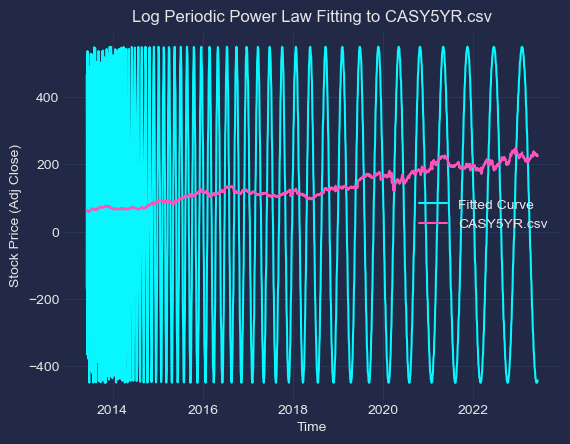

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
import mplcyberpunk


#create autotuning parameter algorithm
import itertools

# Define parameter ranges for grid search
A_range = np.linspace(25, 500, 10)
f0_range = np.linspace(5, 15, 10)
alpha_range = np.linspace(0.05, 0.15, 10)

best_fit = None
best_mse = float('inf')




def log_periodic_power_law(params, t, y):
    A, f0, phi, alpha = params
# Print the input values to check for any issues
    #print("A:", A)
    #print("f0:", f0)
    #print("phi:", phi)
    #print("alpha:", alpha)
    #print("t:", t)
    #print("y:", y)
    
    # Initialize residuals array
    residuals = np.zeros_like(t)

    for i in range(len(t)):
        if t[i] < 1e-6:
            t_val = 1e-6  # Replace very small values with a small positive value
        else:
            t_val = t[i]

    residuals[i] = y[i] - (A * np.sin(2 * np.pi * (f0 * np.log(t_val) + alpha * np.log(np.log(t_val)))) + 50)

    #print("i:", i)
    #print("t[i]:", t[i])
    #print("y[i]:", y[i])


    return residuals

# Load the CASY5YR.csv data
data = pd.read_csv('D:/mainline/LPPLS/lppls-enhanced/lppls/data/CASY5YR.csv')
nan_rows = data[data['Adj Close'].isna()]
#print(nan_rows)


# Remove rows with NaN values from the data
data.dropna(subset=['Adj Close'], inplace=True)

# Extract the 'Adj Close' column from the cleaned data
data.dropna(subset=['Adj Close'], inplace=True)
adj_close = data['Adj Close'].fillna(data['Adj Close'].mean())

adj_close = data['Adj Close']



# Generate time values for the cleaned data
time = np.arange(len(adj_close)) + 1



# Extract the 'Date' column and 'Adj Close' column from the data
dates = pd.to_datetime(data['Date'])


# Generate time values
time = np.arange(len(adj_close)) + 1

# Define initial parameter values
initial_params = [100, 10.0, 1.0, 1.0]  # Adjust the initial values as needed

# Define parameter bounds to ensure finite residuals
param_bounds = ([0, 0, 0, 0], [np.inf, np.inf, np.inf, 1])  # Adjust bounds as needed




# Perform least squares optimization
result = least_squares(log_periodic_power_law, initial_params, bounds=param_bounds, args=(time, adj_close), method='trf')

print(result.success)


# Perform grid search
for A, f0, alpha in itertools.product(A_range, f0_range, alpha_range):
    initial_params = [A, f0, 1.0, alpha]  # Adjust initial values as needed
    result = least_squares(log_periodic_power_law, initial_params, bounds=param_bounds, args=(time, adj_close))

    if result.success:
        fitted_curve = log_periodic_power_law(result.x, time, adj_close) + adj_close
        mse = ((fitted_curve - adj_close) ** 2).mean()

        if mse < best_mse:
            best_mse = mse
            best_fit = result

# Use the best fit
A_opt, f0_opt, phi_opt, alpha_opt = best_fit.x



# Extract the optimized parameter values
A_opt, f0_opt, phi_opt, alpha_opt = result.x

# Generate the fitted curve
offset = 1e-6  # A small offset to prevent division by zero
fitted_curve = A_opt * np.sin(2 * np.pi * (f0_opt * np.log(time + offset) + alpha_opt * np.log(np.log(time + offset)))) + 50



plt.style.use("cyberpunk")

# Plot the fitted curve and the stock price data
plt.plot(dates, fitted_curve, label='Fitted Curve')
plt.plot(dates, adj_close, label='CASY5YR.csv')
plt.xlabel('Time')
plt.ylabel('Stock Price (Adj Close)')
plt.title('Log Periodic Power Law Fitting to CASY5YR.csv')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import least_squares
import mplcyberpunk


#alternative parameter autotuning algorithm
import random

num_trials = 100
best_fit = None
best_mse = float('inf')

for _ in range(num_trials):
    A = random.uniform(500, 1500)
    f0 = random.uniform(5, 15)
    alpha = random.uniform(0.05, 0.15)

    initial_params = [A, f0, 1.0, alpha]  # Adjust initial values as needed
    result = least_squares(log_periodic_power_law, initial_params, bounds=param_bounds, args=(time, adj_close))

    if result.success:
        fitted_curve = log_periodic_power_law(result.x, time, adj_close) + adj_close
        mse = ((fitted_curve - adj_close) ** 2).mean()

        if mse < best_mse:
            best_mse = mse
            best_fit = result

# Use the best fit
A_opt, f0_opt, phi_opt, alpha_opt = best_fit.x



def log_periodic_power_law(params, t, y):
    A, f0, phi, alpha = params
# Print the input values to check for any issues
    #print("A:", A)
    #print("f0:", f0)
    #print("phi:", phi)
    #print("alpha:", alpha)
    #print("t:", t)
    #print("y:", y)
    
    # Initialize residuals array
    residuals = np.zeros_like(t)

    for i in range(len(t)):
        if t[i] < 1e-6:
            t_val = 1e-6  # Replace very small values with a small positive value
        else:
            t_val = t[i]

    residuals[i] = y[i] - (A * np.sin(2 * np.pi * (f0 * np.log(t_val) + alpha * np.log(np.log(t_val)))) + 50)

    #print("i:", i)
    #print("t[i]:", t[i])
    #print("y[i]:", y[i])


    return residuals

# Load the CASY5YR.csv data
data = pd.read_csv('D:/mainline/LPPLS/lppls-enhanced/lppls/data/CASY5YR.csv')
nan_rows = data[data['Adj Close'].isna()]
print(nan_rows)


# Remove rows with NaN values from the data
data.dropna(subset=['Adj Close'], inplace=True)

# Extract the 'Adj Close' column from the cleaned data
data.dropna(subset=['Adj Close'], inplace=True)
adj_close = data['Adj Close'].fillna(data['Adj Close'].mean())

adj_close = data['Adj Close']



# Generate time values for the cleaned data
time = np.arange(len(adj_close)) + 1



# Extract the 'Date' column and 'Adj Close' column from the data
dates = pd.to_datetime(data['Date'])


# Generate time values
time = np.arange(len(adj_close)) + 1

# Define initial parameter values
initial_params = [500, 10.0, 1.0, 1.0]  # Adjust the initial values as needed

# Define parameter bounds to ensure finite residuals
param_bounds = ([0, 0, 0, 0], [np.inf, np.inf, np.inf, 1])  # Adjust bounds as needed




# Perform least squares optimization
result = least_squares(log_periodic_power_law, initial_params, bounds=param_bounds, args=(time, adj_close), method='trf')

print(result.success)

# Extract the optimized parameter values
A_opt, f0_opt, phi_opt, alpha_opt = result.x

# Generate the fitted curve
offset = 1e-6  # A small offset to prevent division by zero
fitted_curve = A_opt * np.sin(2 * np.pi * (f0_opt * np.log(time + offset) + alpha_opt * np.log(np.log(time + offset)))) + 50



plt.style.use("cyberpunk")

# Plot the fitted curve and the stock price data
plt.plot(dates, fitted_curve, label='Fitted Curve')
plt.plot(dates, adj_close, label='CASY5YR.csv')
plt.xlabel('Time')
plt.ylabel('Stock Price (Adj Close)')
plt.title('Log Periodic Power Law Fitting to CASY5YR.csv')
plt.grid(True)
plt.legend()
plt.show()
